# Natalia Palej A00279259
Software Design with Artificial Intelligence for Cloud Computing 
Year 4

# Part 3: Analysis of Pokémon Distribution by Primary Type

## Make Necessary Imports

In [50]:
import pandas as pd 
import numpy as np
# Plotly needed for creating visualizations
import plotly.graph_objects as go

## Load Cleaned Pokemon Dataset 

Loaded cleaned pokemon data and performed simple operations to verify df

In [40]:
df = pd.read_pickle('data/cleaned_pokemon_data.pkl')

In [41]:
df.head()

,name,national_no,species,ev_yield,catch_rate,base_friendship,base_exp,growth_rate,egg_groups,egg_cycles,...,pokemon_img_url,height_m,weight_kg,primary_type,secondary_type,male_percentage,female_percentage,gen,primary_ability,secondary_ability
0,bulbasaur,1,Seed Pokémon,1 Sp. Atk,45.0,50.0,64,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/bulbasaur.jpg,0.7,6.9,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
1,ivysaur,2,Seed Pokémon,"1 Sp. Atk, 1 Sp. Def",45.0,50.0,142,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/ivysaur.jpg,1.0,13.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
2,venusaur,3,Seed Pokémon,"2 Sp. Atk, 1 Sp. Def",45.0,50.0,236,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/venusaur.jpg,2.0,100.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
3,charmander,4,Lizard Pokémon,1 Speed,45.0,50.0,62,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmander.jpg,0.6,8.5,fire,Pure,87.5,12.5,1,Blaze,Solar Power
4,charmeleon,5,Flame Pokémon,"1 Sp. Atk, 1 Speed",45.0,50.0,142,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmeleon.jpg,1.1,19.0,fire,Pure,87.5,12.5,1,Blaze,Solar Power


In [42]:
df.shape

(405, 40)

In [43]:
df.columns

Index(['name', 'national_no', 'species', 'ev_yield', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_groups',
       'egg_cycles', 'hp', 'min_hp', 'max_hp', 'attack', 'min_attack',
       'max_attack', 'defense', 'min_defense', 'max_defense', 'sp_atk',
       'min_sp_atk', 'max_sp_atk', 'sp_def', 'min_sp_def', 'max_sp_def',
       'speed', 'min_speed', 'max_speed', 'total', 'evo_path',
       'pokemon_img_url', 'height_m', 'weight_kg', 'primary_type',
       'secondary_type', 'male_percentage', 'female_percentage', 'gen',
       'primary_ability', 'secondary_ability'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               405 non-null    object  
 1   national_no        405 non-null    Int64   
 2   species            405 non-null    object  
 3   ev_yield           405 non-null    object  
 4   catch_rate         405 non-null    float64 
 5   base_friendship    405 non-null    float64 
 6   base_exp           405 non-null    int32   
 7   growth_rate        405 non-null    object  
 8   egg_groups         405 non-null    object  
 9   egg_cycles         405 non-null    int64   
 10  hp                 405 non-null    Int64   
 11  min_hp             405 non-null    Int64   
 12  max_hp             405 non-null    Int64   
 13  attack             405 non-null    Int64   
 14  min_attack         405 non-null    Int64   
 15  max_attack         405 non-null    Int64   
 16  defense 

## Data Aggregation

### Utilize the value_counts() method on the primary_type column to tally the number of Pokémon for each type

Count and print how many Pokémon there are for each primary type

In [45]:
primary_type_count = df.primary_type.value_counts()
print(primary_type_count)

primary_type
water       73
normal      60
grass       36
bug         36
fire        29
psychic     23
electric    22
rock        21
poison      18
ground      17
fighting    13
ice         12
steel       11
dragon      10
dark         9
ghost        8
fairy        7
Name: count, dtype: int64


## Color Scheme Mapping

### Create a dictionary mapping each Pokémon type to a specific hexadecimal color value, reflecting the colors provided in the initial setup

In [46]:
type_colors = {
    'grass': '#78C850', 'fire': '#F08030', 'water': '#6890F0',
    'bug': '#A8B820', 'normal': '#A8A878', 'poison': '#A040A0',
    'electric': '#F8D030', 'ground': '#E0C068', 'fairy': '#EE99AC',
    'fighting': '#C03028', 'flying': '#A890F0', 'psychic': '#F85888',
    'rock': '#B8A038', 'ghost': '#705898', 'ice': '#98D8D8',
    'dragon': '#7038F8', 'dark': '#705848', 'steel': '#B8B8D0',
}

## Bar Chart Visualization

### Employ a Plotly bar chart to display the count of Pokémon for each type

Create the Plotly figure

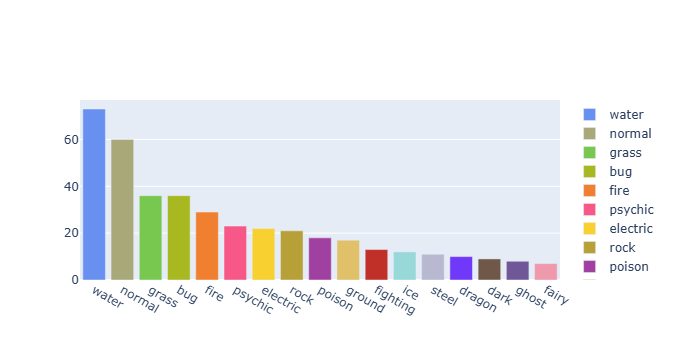

In [47]:
# Initialize empty fig 
fig = go.Figure()

# Loop through each primary type to add a bar for each one
for ptype in primary_type_count.index:
    fig.add_trace(
        # Create a bar chart
        go.Bar(
            # Set the x value to the Pokemon type
            x=[ptype],
            # Set the y value to the count of Pokemon for that type
            y=[primary_type_count[ptype]], 
            # Color the bar according to the type's color
            marker=dict(color=type_colors[ptype]),
            # Show all hover info when the bar is hovered over
            hoverinfo='all', 
            # Set the name for the trace to the Pokemon type
            name=ptype,
        )
    )

# Show the figure
fig.show()

## Bar Chart Configuration

Update the layout of the plot to add a title and set dimensions

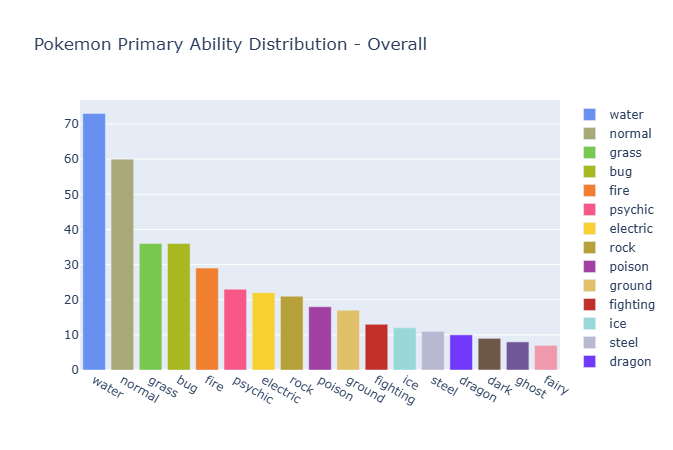

In [48]:
fig.update_layout(
    title_text='Pokemon Primary Ability Distribution - Overall',
    height=450,
    width=800
)

fig.show()